# Diabetes Prediction Model

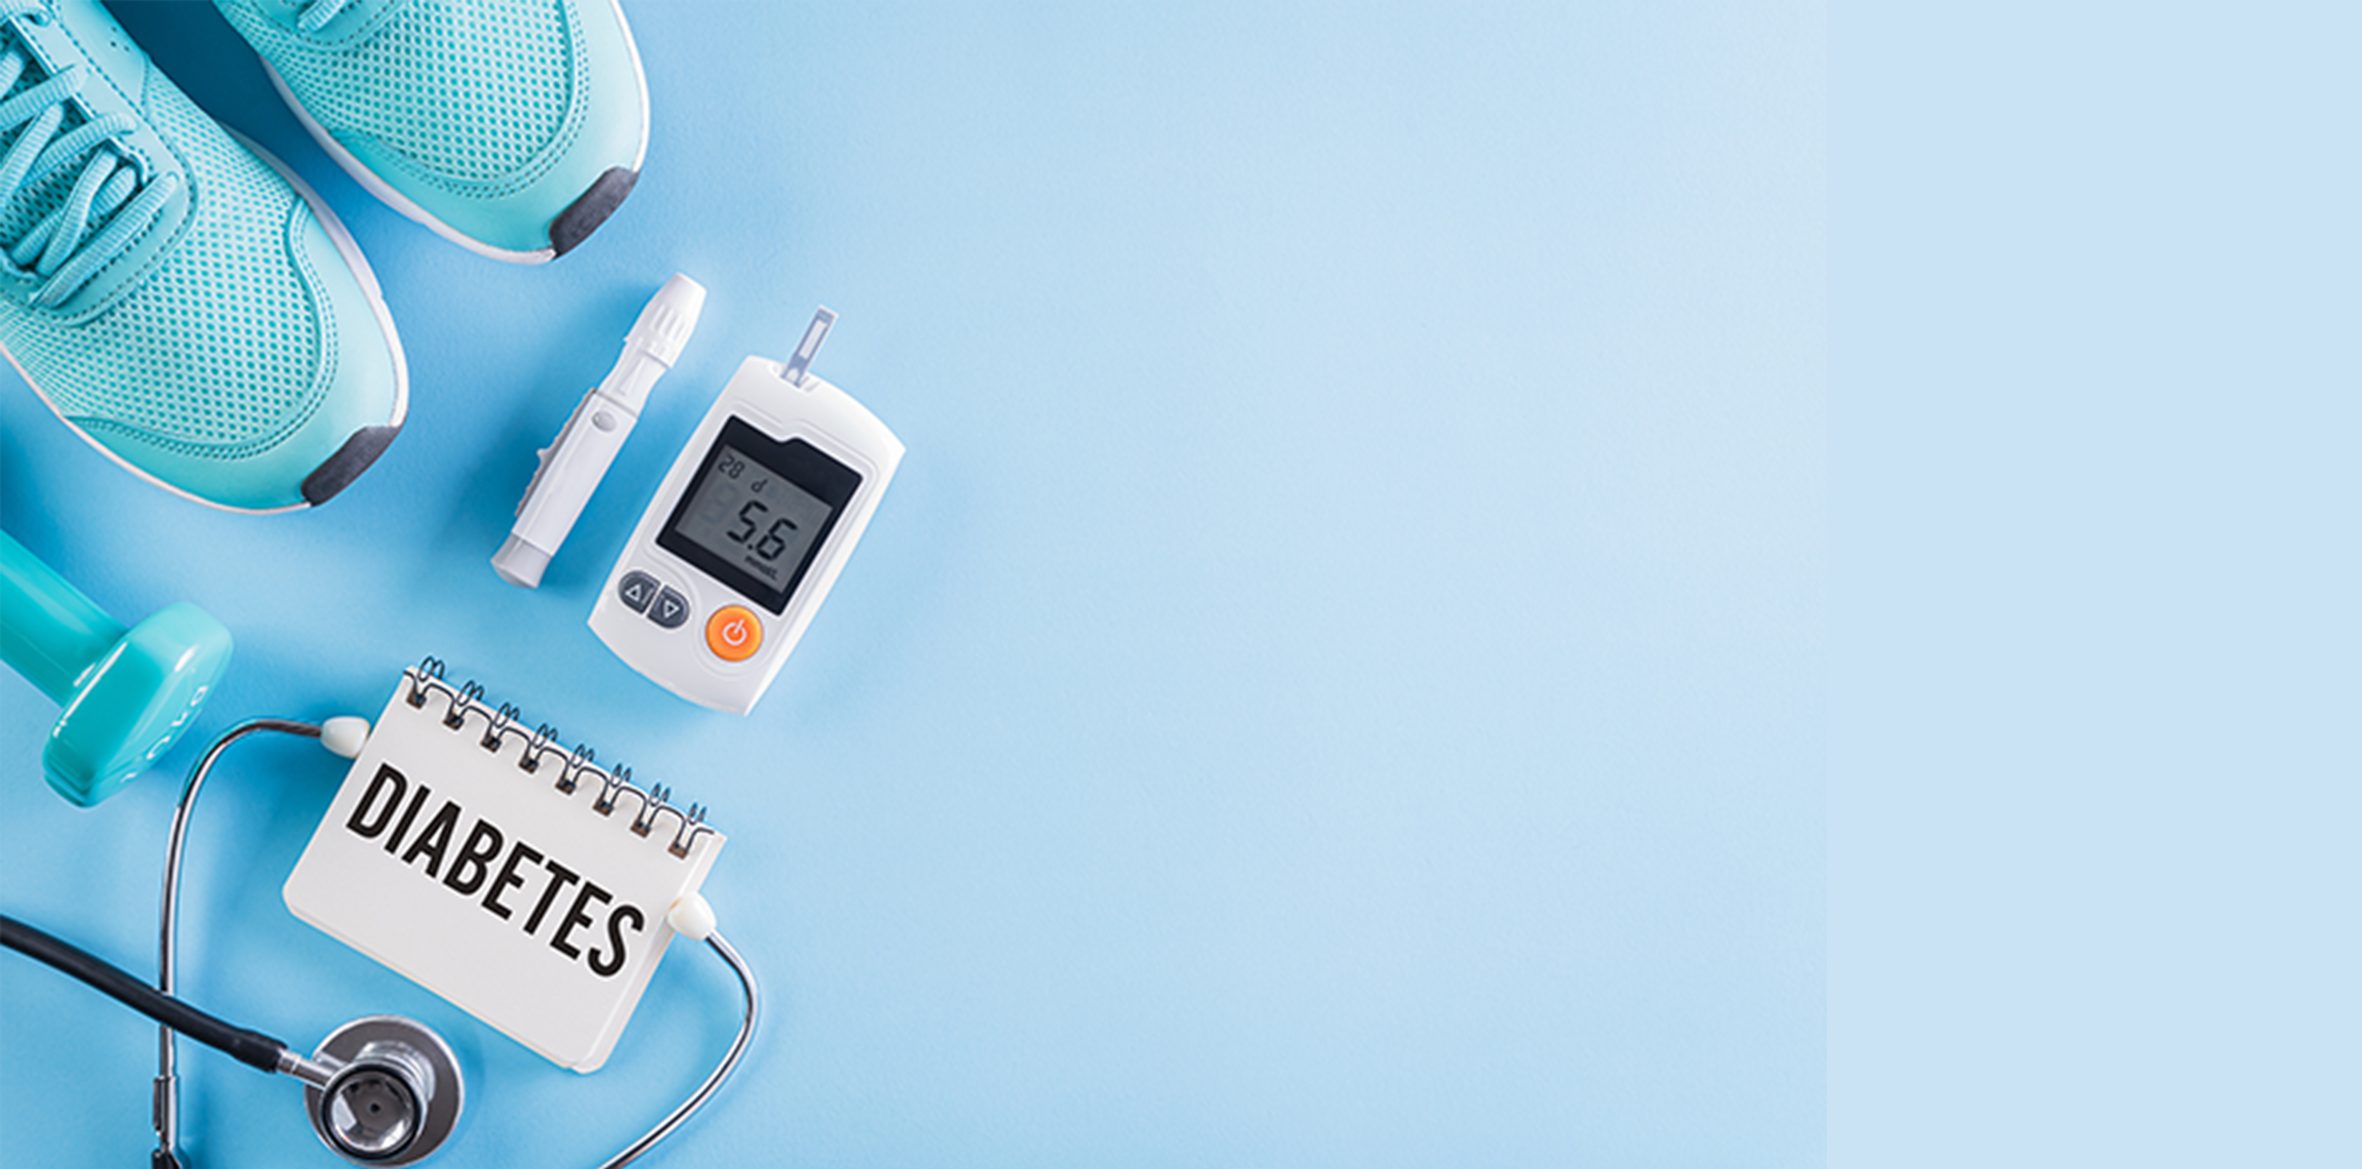

### **Project Overview: Predicting Diabetes in Pima Indian Women**

In this Jupyter Notebook, we embark on a data-driven journey to predict diabetes in a specific demographic group: Pima Indian women aged at least 21 years old. The dataset at our disposal, originally sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, contains various medical predictor variables, culminating in a single dependent variable - the presence or absence of diabetes.

**Key Objectives:**
- **Data Exploration**: We'll begin by delving into the dataset, uncovering patterns, and ensuring data quality.
- **Data Preprocessing**: We'll clean the data, handle missing values, and prepare it for modeling.
- **Model Building**: Our focus will be on selecting, training, and optimizing machine learning models to predict diabetes.
- **Model Evaluation**: We will rigorously assess the performance of our models to ensure their reliability.
- **Interpretation**: The project will conclude with insights into the factors influencing diabetes predictions.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#### Loading dataset

In [116]:
df = pd.read_csv('diabetes.csv')

#### Data understanding

In [117]:
df.shape

(768, 9)

In [118]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [119]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


- **Pregnancies**: The number of pregnancies the individual has had.

- **Glucose**: Plasma glucose concentration in a 2-hour oral glucose tolerance test. This is a measure of the person's blood sugar level.

- **BloodPressure**: Diastolic blood pressure (mm Hg).

- **SkinThickness**: Thickness of the skinfold at the triceps. It is a measure of subcutaneous fat.

- **Insulin**: 2-Hour serum insulin (mu U/ml). Insulin is a hormone that regulates blood sugar.

- **BMI (Body Mass Index)**: Body mass index, which is a measure of body fat based on height and weight.

- **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history.

- **Age**: Age of the individual.

- **Outcome**: The target variable indicating whether the individual has diabetes (1) or not (0).


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   
count   768.000000  768.000000     768.000000     768.000000  768.000000  \
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Data Preparation

In [122]:
bmi_cat = {
    'Underweight': (0, 18.4),
    'Normal': (18.5, 24.9),
    'Overweight': (25, 29.9),
    'Obese Class I': (30, 34.9),
    'Obese Class II': (35, 39.9),
    'Obese Class III': (40, 100)
}

df['BMI_category'] = ""

for category, (lower, upper) in bmi_cat.items():
    df.loc[(df['BMI'] >= lower) & (df['BMI'] <= upper), 'BMI_category'] = category

df[['BMI', 'BMI_category']].head()

BMI     BMI_category
0  33.6    Obese Class I
1  26.6       Overweight
2  23.3           Normal
3  28.1       Overweight
4  43.1  Obese Class III

In [123]:
age_group = {
    'Young Adults': (20, 39), 
    'Middle-Aged': (40, 59), 
    'Seniors': (60, 100)
}

df['Age_group'] = ""

for category, (lower, upper) in age_group.items():
    df.loc[(df['Age'] >= lower) & (df['Age'] <= upper), 'Age_group'] = category

df[['Age', 'Age_group']].head()

Age     Age_group
0   50   Middle-Aged
1   31  Young Adults
2   32  Young Adults
3   21  Young Adults
4   33  Young Adults

In [124]:
blood_pressure_categories = {
    'Low': (0, 90),     
    'Normal': (90, 120), 
    'High': (120, 180)  
}

df['BloodPressure_Category'] = ""

for category, (lower, upper) in blood_pressure_categories.items():
    df.loc[(df['BloodPressure'] >= lower) & (df['BloodPressure'] < upper), 'BloodPressure_Category'] = category
    
df[['BloodPressure', 'BloodPressure_Category']].head()

BloodPressure BloodPressure_Category
0             72                    Low
1             66                    Low
2             64                    Low
3             66                    Low
4             40                    Low

In [125]:
# to find duplicate values
df.duplicated().sum()

0

In [126]:
# to detect null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_category                0
Age_group                   0
BloodPressure_Category      0
dtype: int64

#### Feature Understanding

In [127]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome     BMI_category     Age_group   
0                     0.627   50        1    Obese Class I   Middle-Aged  \
1                     0.351   31        0       Overweight  Young Adults   
2                     0.672   32        1           Normal  Young Adults   
3                     0.167   21        0       Overweight  Young Adults   
4                     2.288   33        1  Obese Class III  Young Adults   

  BloodPressure_Category  
0                    Low  
1                    Low  
2                    Low  
3                    Low  
4                    Low

In [128]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_category',
       'Age_group', 'BloodPressure_Category'],
      dtype='object')

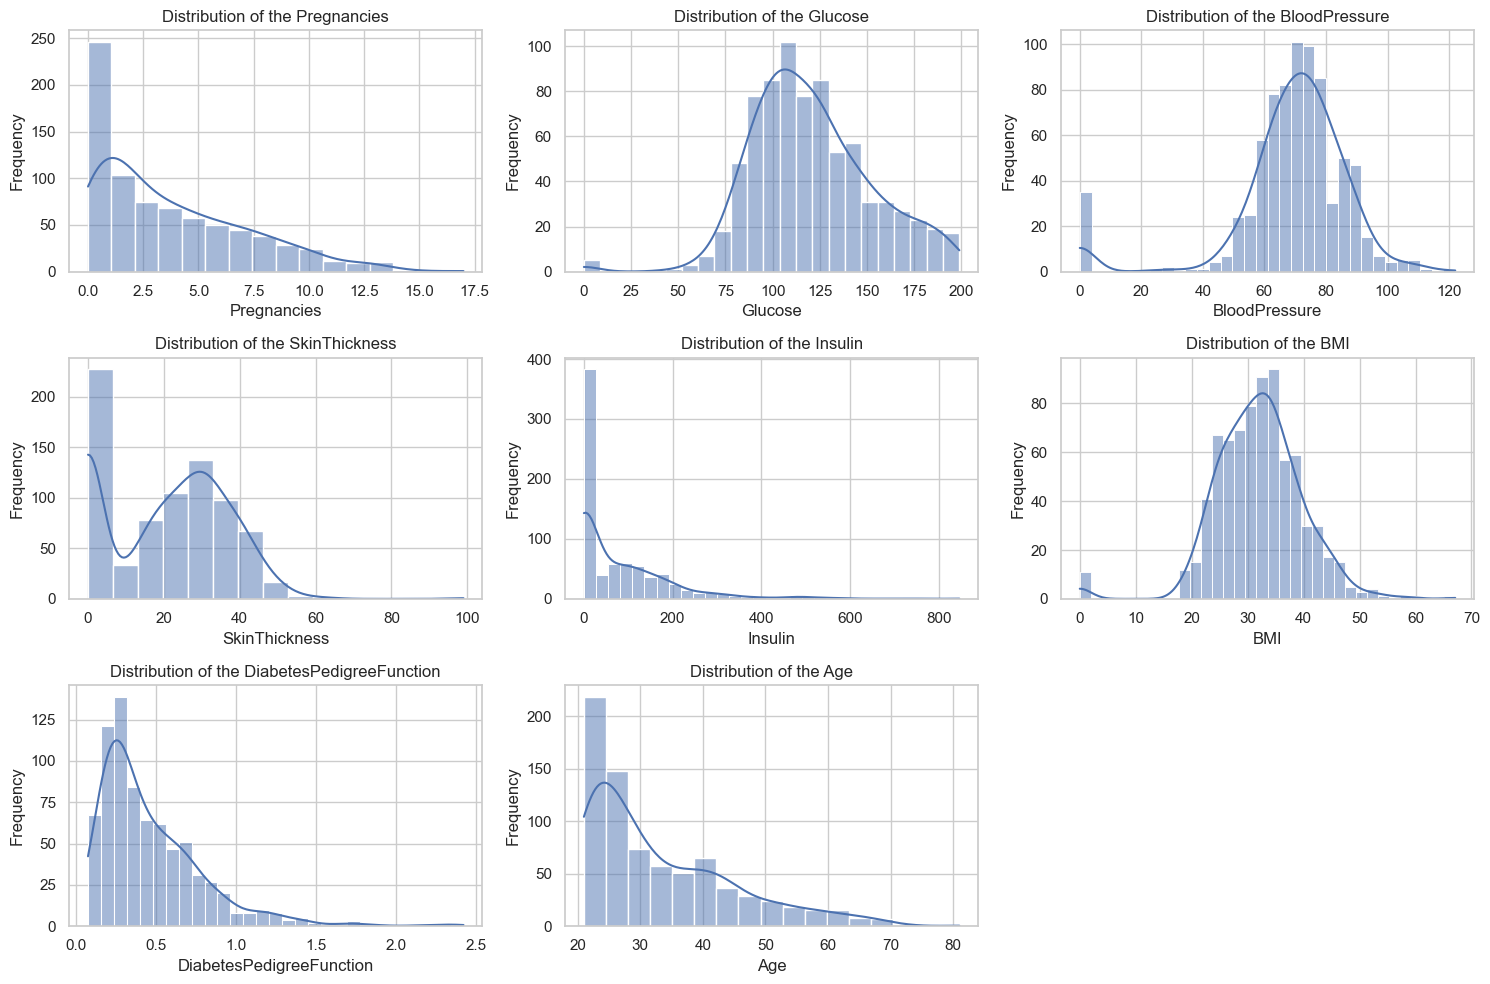

In [129]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'
        #'Outcome', 'BMI_category','Age_group', 'BloodPressure_Category'
       ]

sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of the {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

<h3><b>Pregnancies:</b></h3>
    The 'Pregnancies' variable is right-skewed, indicating that the majority of women in the dataset have 0 to a moderate number of pregnancies.

<h3><b>Glucose, BloodPressure, and BMI:</b></h3>
    The distributions of 'Glucose,' 'BloodPressure,' and 'BMI' are nearly symmetrical, but it's important to note that there are some data points with values of 0, which may be indicative of data quality issues. <span style="color:red">Zero values in these variables are not realistic and should be investigated for potential data errors</span>.

<h3><b>SkinThickness and Insulin:</b></h3>
    Both 'SkinThickness' and 'Insulin' columns exhibit positive skewness. Additionally, there is a significant number of data points with zero values in these columns, which is unlikely and may point to data quality problems.

<h3><b>DiabetesPedigreeFunction:</b></h3>
    The 'DiabetesPedigreeFunction' column is right-skewed, suggesting that the majority of participants in the dataset have a low to moderate likelihood of diabetes based on family history.

<h3><b>Age:</b></h3>
    The 'Age' column is also right-skewed, with most participants falling in the age range of 20 to 35.

</div>


#### Correlation analysis

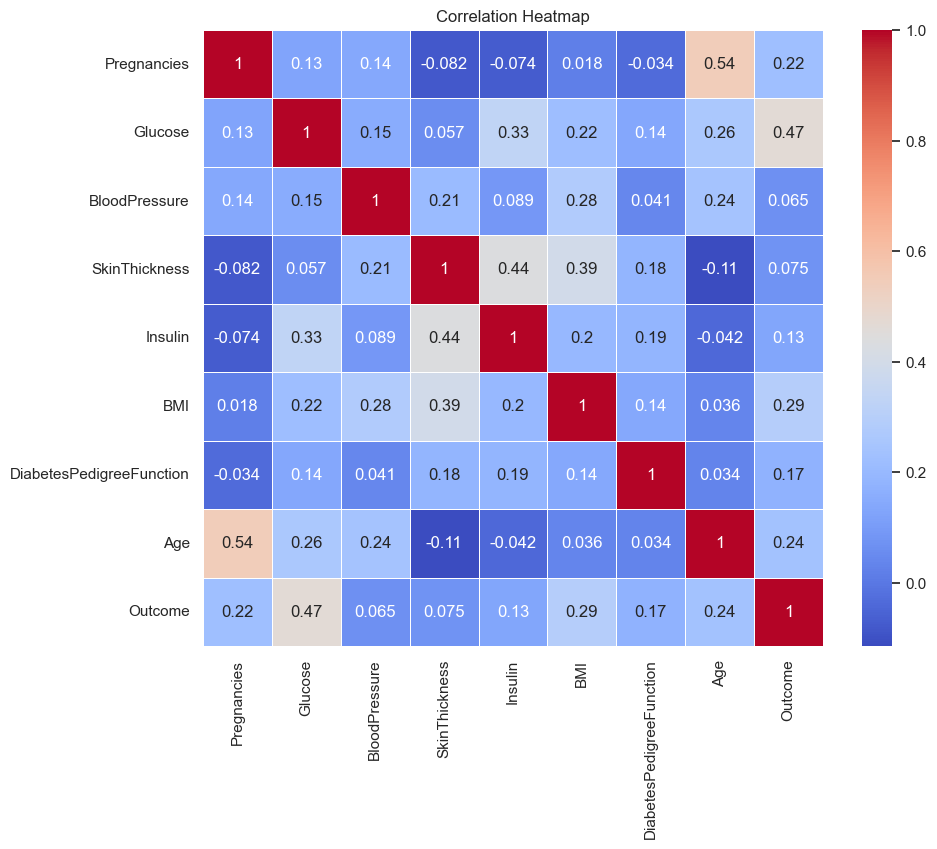

In [130]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[cols + ['Outcome']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<div class="alert alert-block alert-info">

- **Correlation with Outcome:**
    - 'Glucose,' 'BMI,' and 'Age' have a moderate positive correlation with the 'Outcome' variable.

- **Correlation Between Features:**
    - 'Pregnancies' and 'Age' are positively correlated, suggesting that the higher the age, the more pregnancies a person has had.
    - 'SkinThickness' is negatively correlated with 'Age,' indicating an inverse relationship.
    - 'Glucose,' 'BloodPressure,' 'SkinThickness,' and 'Outcome' are moderately positively correlated with 'BMI.'
    - 'Glucose' and 'SkinThickness' are correlated with 'Insulin.'

</div>

### Data Preparation

#### Hadling Missing Values

In [131]:
glucose_missing = df.loc[df['Glucose'] == 0].shape[0]
pressure_missing = df.loc[df['BloodPressure'] == 0].shape[0]
skin_missing = df.loc[df['SkinThickness'] == 0].shape[0]
insulin_missing = df.loc[df['Insulin'] == 0].shape[0]
BMI_missing = df.loc[df['BMI'] == 0].shape[0]

print(f'Count of missing values in Glucose column: {glucose_missing}')
print(f'Count of missing values in BloodPressure column: {pressure_missing}')
print(f'Count of missing values in SkinThickness column: {skin_missing}')
print(f'Count of missing values in Insulin column: {insulin_missing}')
print(f'Count of missing values in BMI column: {BMI_missing}')

Count of missing values in Glucose column: 5
Count of missing values in BloodPressure column: 35
Count of missing values in SkinThickness column: 227
Count of missing values in Insulin column: 374
Count of missing values in BMI column: 11


<div class="alert alert-block alert-info">

The count of missing values in Glucose, BloodPressure, and BMI are relatively low;
    So, replacing it with corresponding median values

</div>

In [132]:
df.loc[df['Glucose'] == 0, 'Glucose'] = df['Glucose'].median()
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = df['BloodPressure'].median()
df.loc[df['BMI'] == 0, 'BMI'] = df['BMI'].median()

<div class="alert alert-block alert-info">

The count of missing values in SkinThickness and Insulin are very high;
    So, using predictive methods to fill it in

</div>

<div class="alert alert-block alert-info">

According to correlation matrix, 'Glucose', 'SkinThickness', and 'BMI' are more correlated to Insulin

</div>

In [133]:
from sklearn.linear_model import LinearRegression

# Split data into two parts
data_missing_insulin = df[(df['Insulin'] == 0)]
data_complete = df[(df['Insulin'] != 0) &  (df['SkinThickness'] != 0)]

# Define features and target
X = data_complete[['Glucose', 'SkinThickness', 'BMI']]
y = data_complete['Insulin']

# Create and train the regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [134]:
# Predict 'Insulin' values for data with missing values
X_missing = data_missing_insulin[['Glucose', 'SkinThickness', 'BMI']]
predicted_insulin = model.predict(X_missing)

# Replace the missing 'Glucose' values with predictions
data_missing_insulin['Insulin'] = predicted_insulin

C:\Users\user\AppData\Local\Temp\ipykernel_4036\2177508827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_insulin['Insulin'] = predicted_insulin


In [135]:
# Combine data with imputed values with the original dataset
df = pd.concat([data_missing_insulin, df[(df['Insulin'] != 0)]], axis=0)

<div class="alert alert-block alert-info">

According to correlation matrix, 'BloodPressure', 'Insulin', and 'BMI' are more correlated to SkinThickness

</div>

In [136]:
# Split data into two parts
data_missing_SkinThickness = df.loc[df['SkinThickness'] == 0]
data_complete = df[df['SkinThickness'] != 0]

# Define features and target
X = data_complete[[ 'BloodPressure', 'Insulin', 'BMI']]
y = data_complete['SkinThickness']

# Create and train the regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [137]:
# Predict 'SkinThickness' values for data with missing values
X_missing = data_missing_SkinThickness[['BloodPressure', 'Insulin', 'BMI']]
predicted_SkinThickness = model.predict(X_missing)

# Replace the missing 'Glucose' values with predictions
data_missing_SkinThickness['SkinThickness'] = predicted_SkinThickness

C:\Users\user\AppData\Local\Temp\ipykernel_4036\2247552535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_SkinThickness['SkinThickness'] = predicted_SkinThickness


In [138]:
df = pd.concat([data_missing_SkinThickness, data_complete], axis=0)

In [139]:
df.shape

(768, 12)

#### Distribution of various features after handling missing values

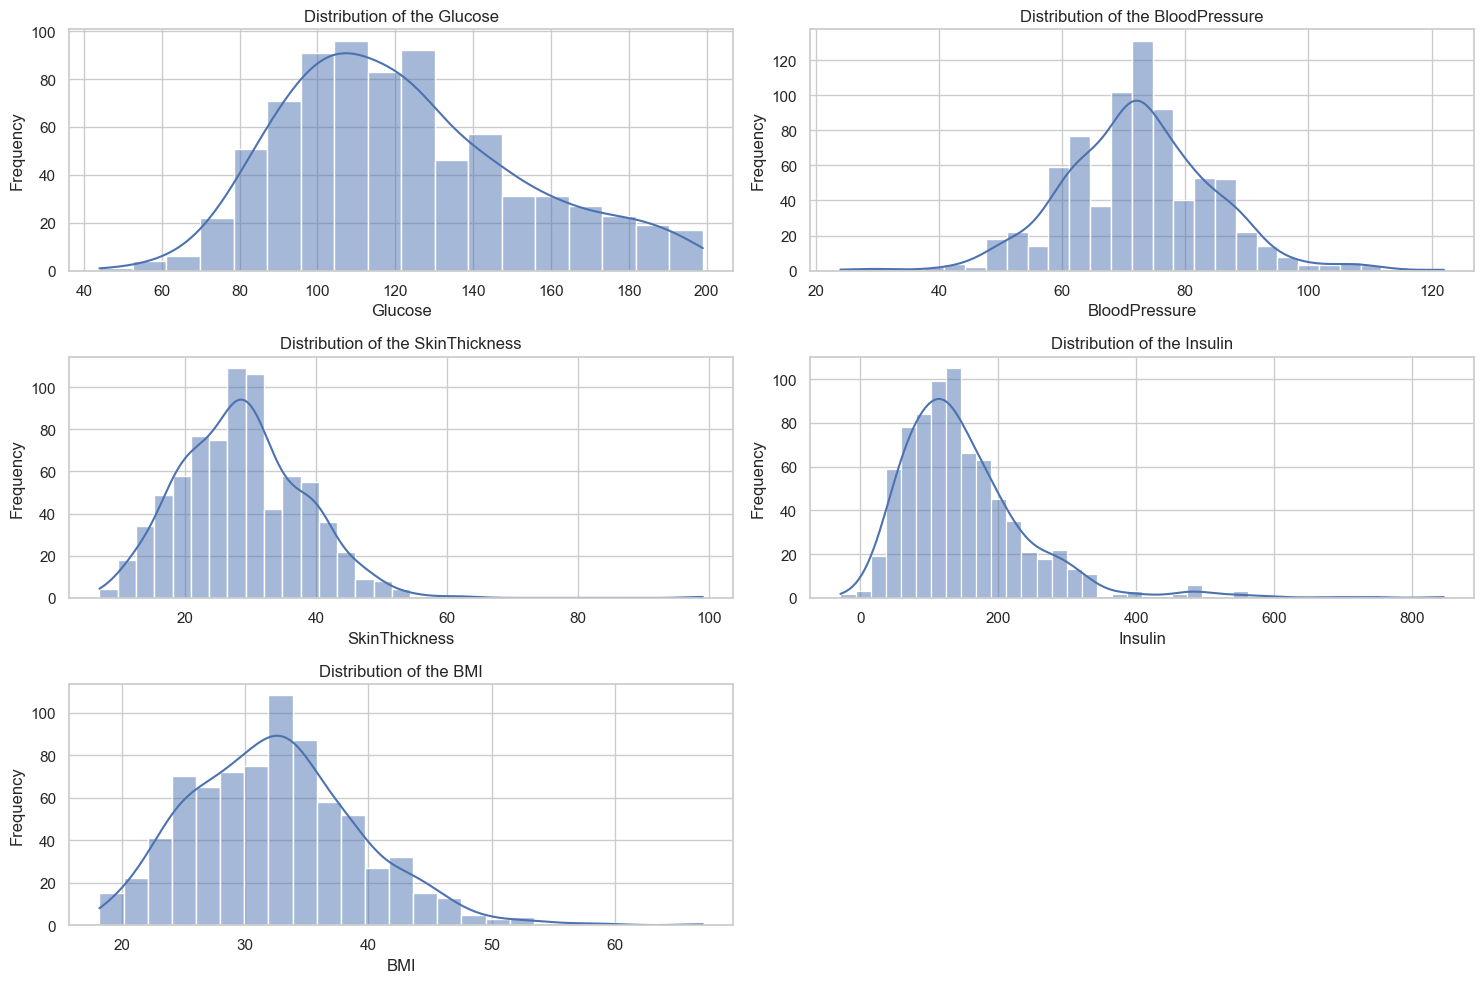

In [140]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of the {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()

In [141]:
outcome_1 = df.loc[df['Outcome'] == 1, 'Outcome'].value_counts().values[0]
outcome_0 = df.loc[df['Outcome'] == 0, 'Outcome'].value_counts().values[0]

print(f'No. of patients with outcome 1: {outcome_1}')
print(f'No. of patients with outcome 0: {outcome_0}')

No. of patients with outcome 1: 268
No. of patients with outcome 0: 500


<div class="alert alert-block alert-info">

After handling missing values, the distributions of 'Glucose' and 'BloodPressure' exhibit a relatively symmetrical shape, with 'Glucose' showing slightly heavier tails towards the right side. In contrast, 'SkinThickness,' 'Insulin,' and 'BMI' are positively skewed. These skewed distributions may be linked to the imbalance in the proportion of patients with diabetes and those without.

The observation of these positively skewed features can be explained by their positive correlation with the presence of diabetes. This means that a higher proportion of patients without diabetes tends to have lower values for these features, which are more concentrated on the left side of their respective distributions. This skewness may indicate that these features play a role in distinguishing between individuals with and without diabetes, with lower values often associated with a lower likelihood of diabetes.

</div>

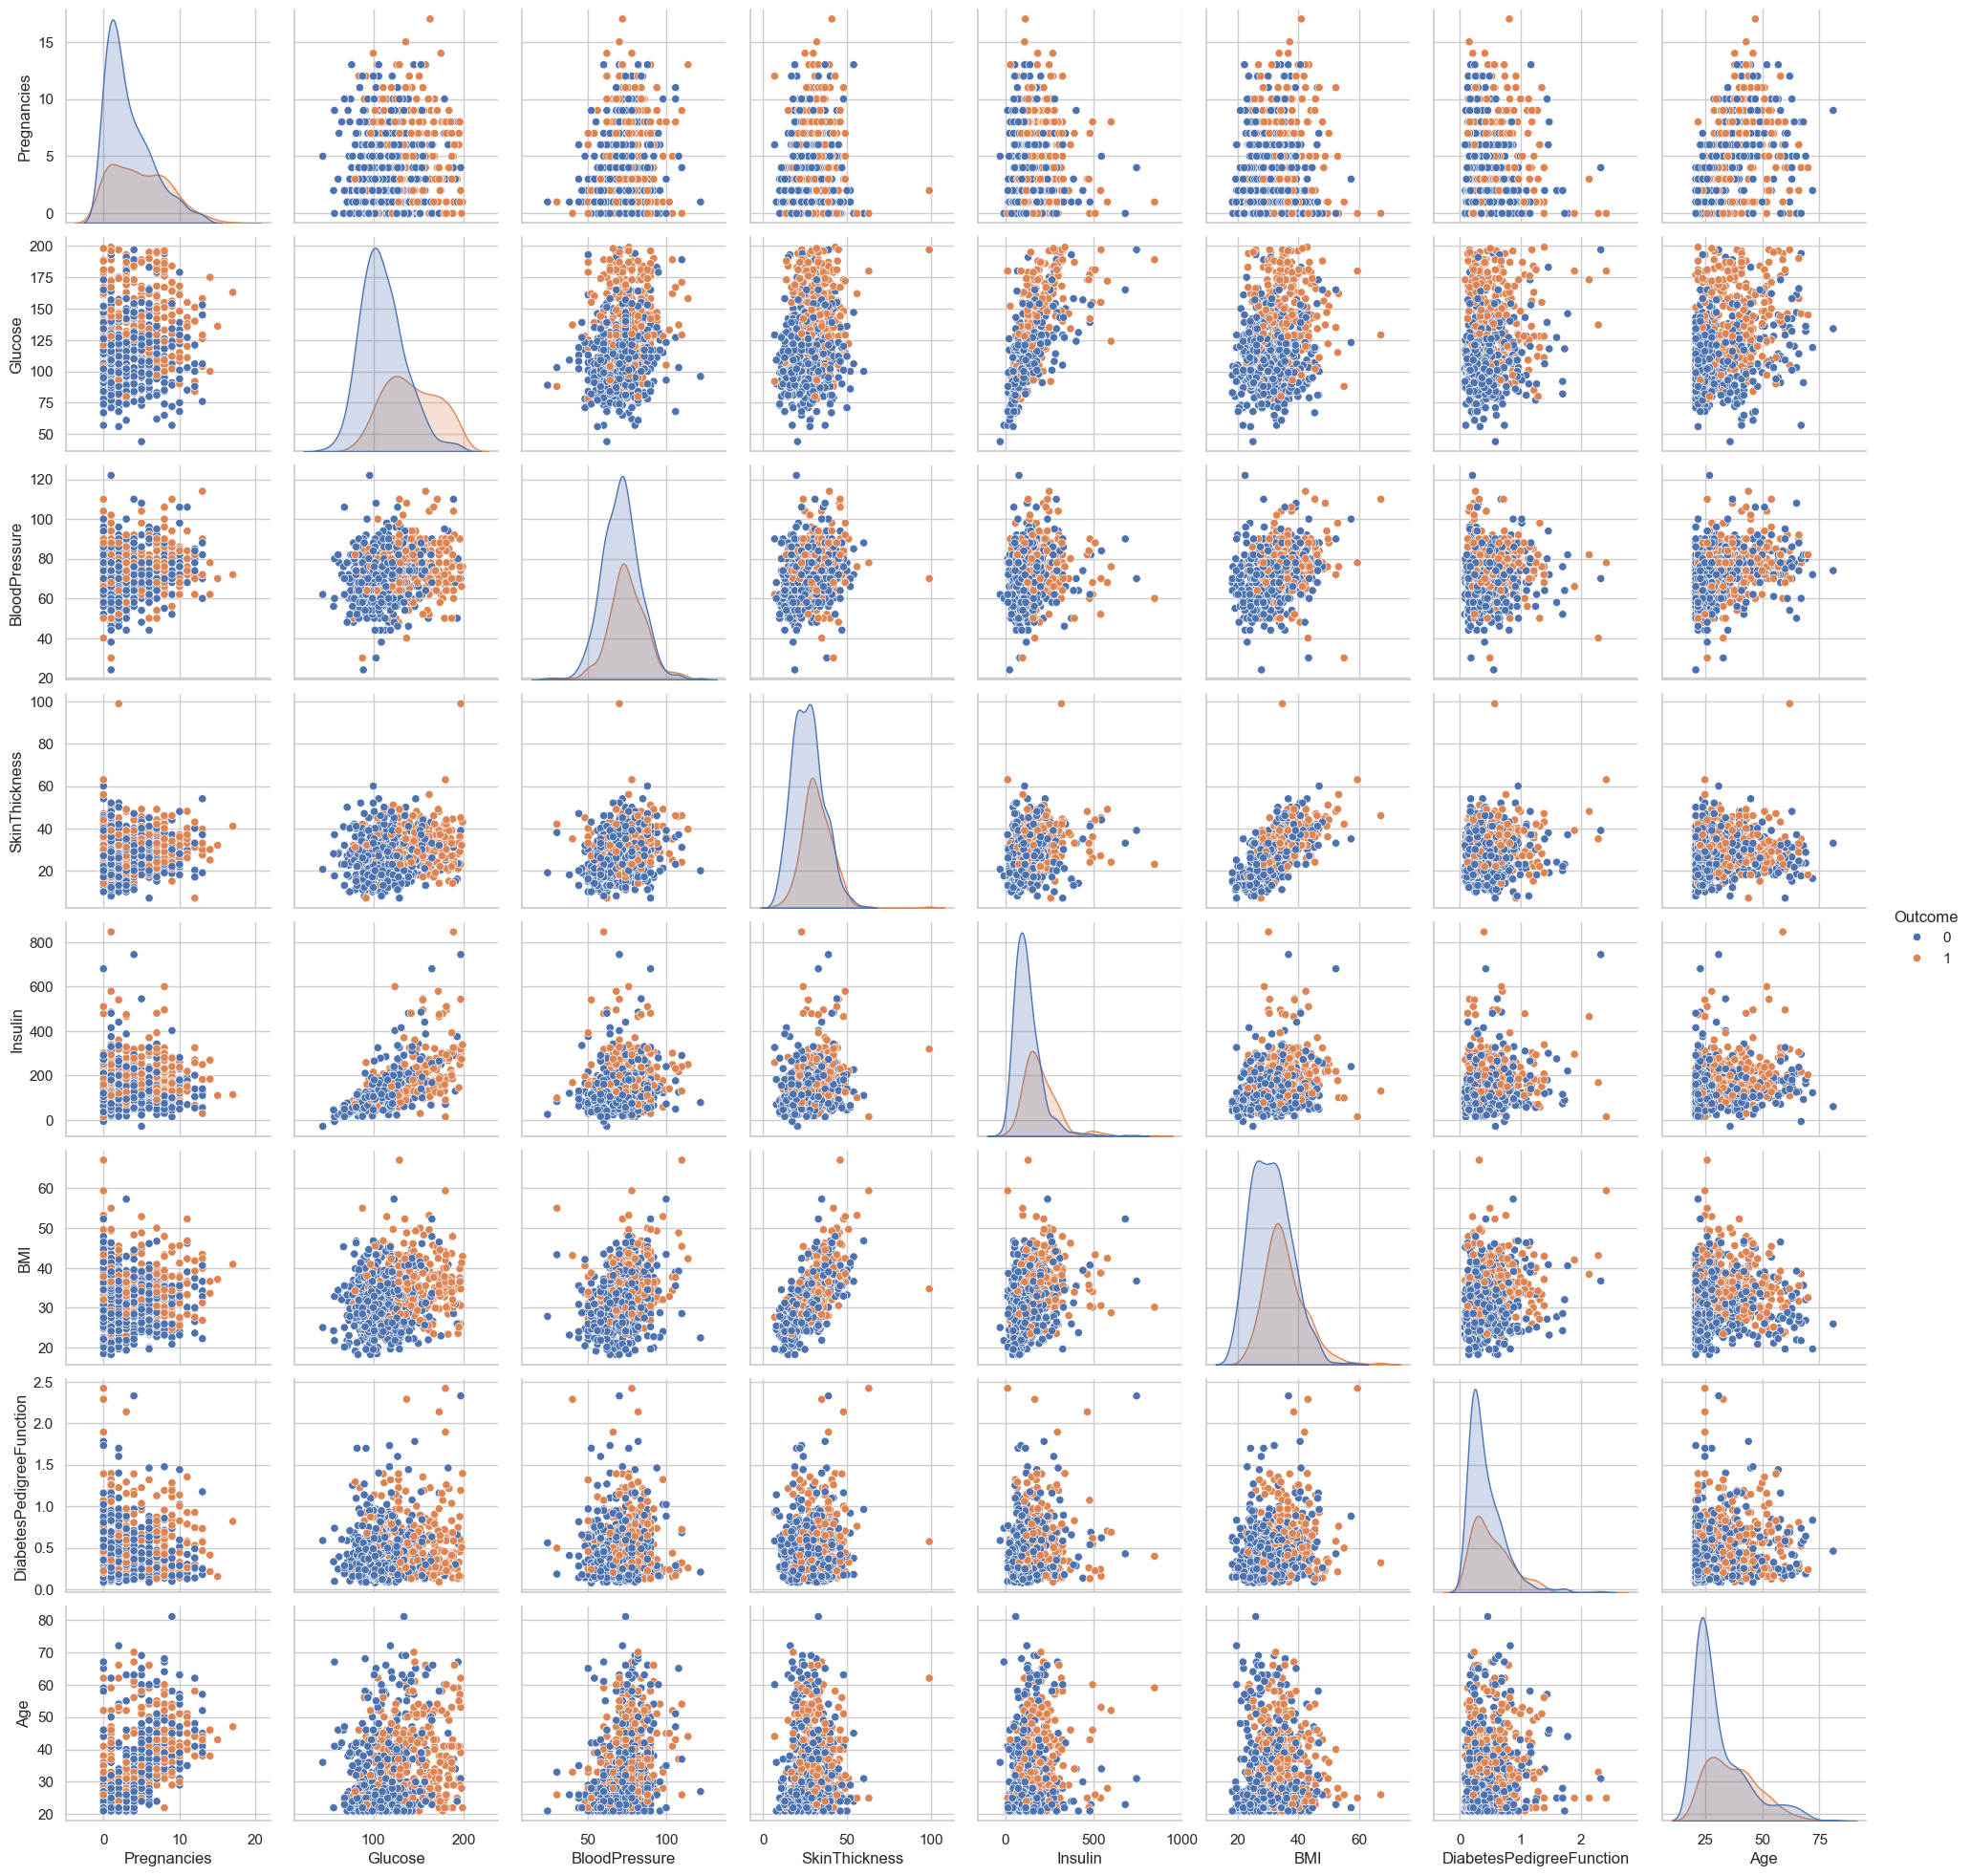

In [142]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(df[cols], hue='Outcome', diag_kind='kde')
plt.show()

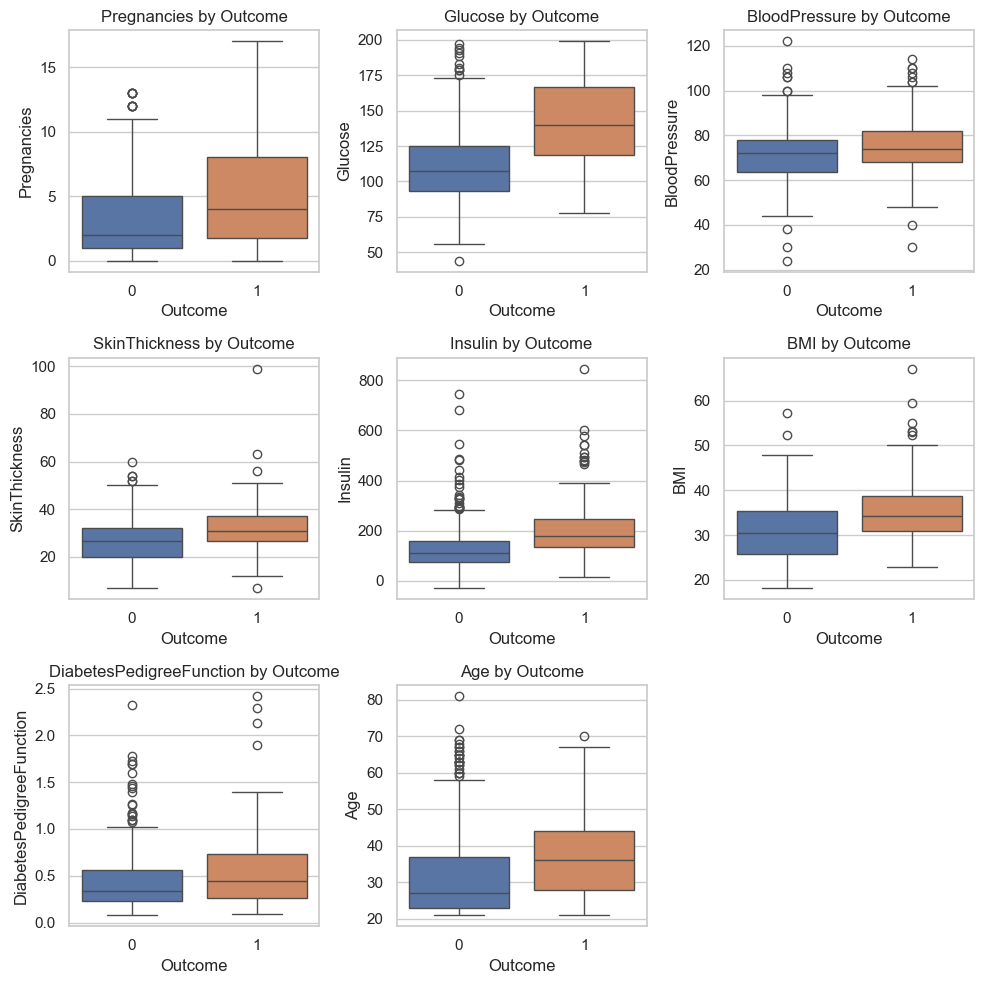

In [143]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(cols[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=col, hue=df['Outcome'], legend=False, data=df)
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

When examining the boxplots, notable distinctions emerge between patients with and without diabetes. The span of the number of pregnancies for diabetic patients is considerably broader than that of non-diabetic individuals. In contrast, for the remaining features, such as 'Glucose,' 'BloodPressure,' 'SkinThickness,' 'Insulin,' 'BMI,' 'DiabetesPedigreeFunction,' and 'Age,' patients with diabetes tend to exhibit higher values when compared to those without diabetes. These features indicate an overall elevation for diabetic patients.

Furthermore, while most features display increased variability for diabetic patients, 'BloodPressure' appears to have relatively lower variations between the two groups.

</div>


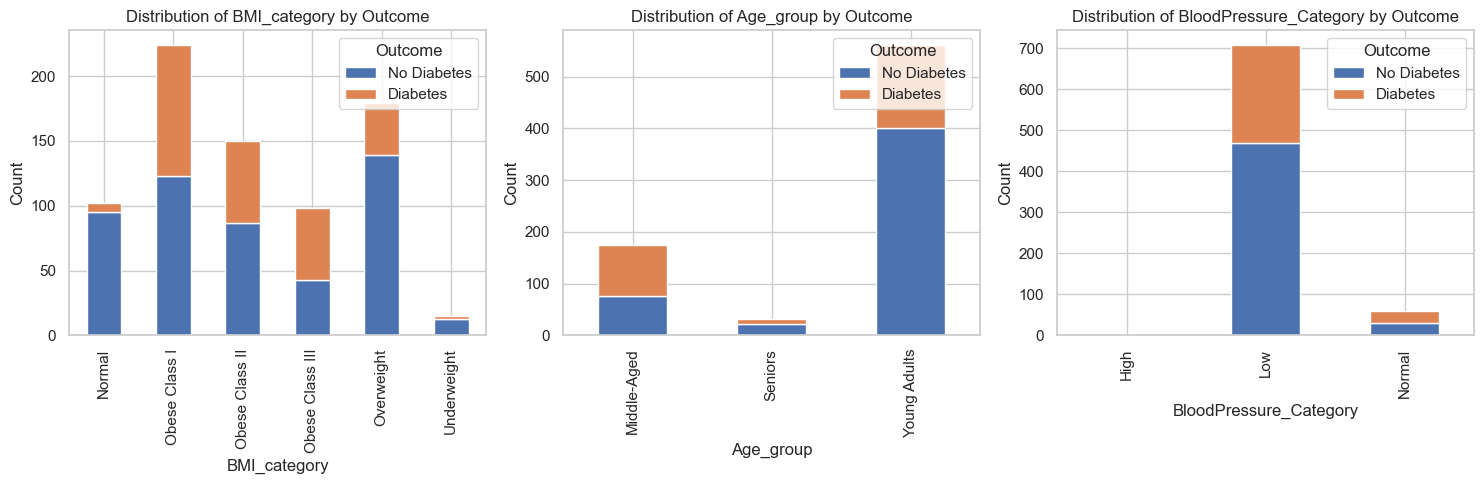

In [144]:
categorical_columns = ['BMI_category', 'Age_group', 'BloodPressure_Category']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Create a DataFrame with counts for each category, grouped by 'Outcome'
    category_counts = df.groupby([col, 'Outcome']).size().unstack()
    
    # Plot the grouped bar plot
    category_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Distribution of {col} by Outcome')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Add a legend
    ax.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'], loc='upper right')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

BMI Category and Diabetes:

- BMI category appears to have a notable impact on the likelihood of diabetes.
- A higher proportion of individuals in the "Obese" category tend to have diabetes.
- This suggests that BMI may be a relevant factor in diabetes prediction.

Age Group and Diabetes:

- Among age groups, young adults tend to have a lower proportion of diabetes patients.
- This indicates that being a young adult may be associated with a lower likelihood of diabetes.

Blood Pressure Category:

- Due to the imbalanced data in the "BloodPressure_Category," further analysis is needed to determine if it has a direct impact on the likelihood of diabetes.
- The impact of blood pressure categories on diabetes may require additional investigation and statistical testing to draw more definitive conclusions.

</div>


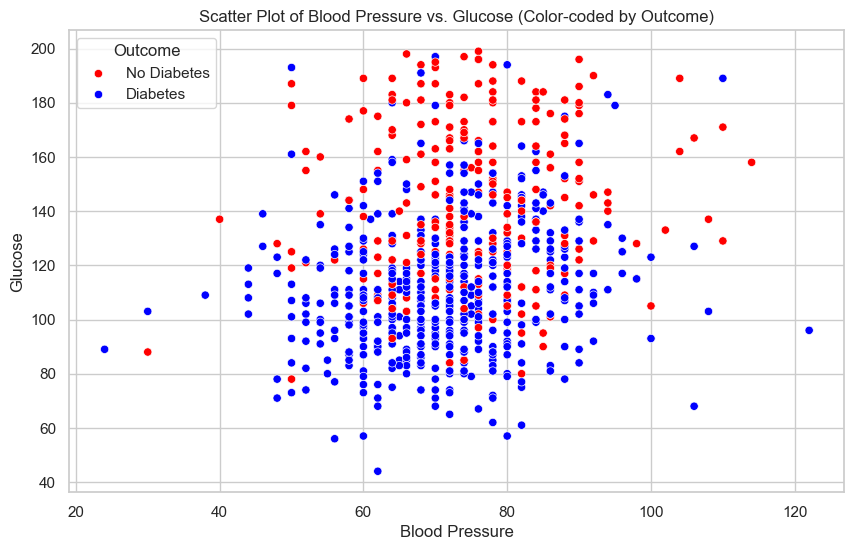

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BloodPressure', y='Glucose', hue='Outcome', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot of Blood Pressure vs. Glucose (Color-coded by Outcome)')
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

#### Hypothesis Testing for BloodPressure_Category

<div class="alert alert-block alert-info">


- Null Hypothesis (H0): There is no association between 'BloodPressure' and 'Outcome.'
- Alternative Hypothesis (H1): There is an association between 'BloodPressure_' and 'Outcome.'

</div>

In [146]:
from scipy.stats import ttest_ind

# Create separate data arrays for blood pressure based on Outcome
blood_pressure_diabetes = df[df['Outcome'] == 1]['BloodPressure']
blood_pressure_no_diabetes = df[df['Outcome'] == 0]['BloodPressure']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(blood_pressure_diabetes, blood_pressure_no_diabetes, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in blood pressure between diabetes and non-diabetes groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in blood pressure between diabetes and non-diabetes groups.")

Reject the null hypothesis. There is a significant difference in blood pressure between diabetes and non-diabetes groups.


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 2 to 765
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_category              768 non-null    object 
 10  Age_group                 768 non-null    object 
 11  BloodPressure_Category    768 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 78.0+ KB


### Encoding

In [148]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols_to_encode = ['BMI_category', 'Age_group', 'BloodPressure_Category']

encoded_data = label_encoder.fit_transform(cols_to_encode)

df[['BMI_category', 'Age_group', 'BloodPressure_Category']] = encoded_data

In [149]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI   
2             8      183             64      20.261991  267.091036  23.3  \
5             5      116             74      22.114196  127.327580  25.6   
7            10      115             72      31.441672  143.468296  35.3   
9             8      125             96      28.888736  158.752978  32.0   
10            4      110             92      34.079124  137.051673  37.6   

    DiabetesPedigreeFunction  Age  Outcome  BMI_category  Age_group   
2                      0.672   32        1             1          0  \
5                      0.201   30        0             1          0   
7                      0.134   29        0             1          0   
9                      0.232   54        1             1          0   
10                     0.191   30        0             1          0   

    BloodPressure_Category  
2                        2  
5                        2  
7                        2  
9                        2  
10                       2

### Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI   
0     1.233880  2.016662      -0.693761      -0.890860  1.174667 -1.331838  \
1     0.342981 -0.185948       0.133453      -0.696560 -0.256378 -0.997092   
2     1.827813 -0.218823      -0.031990       0.281908 -0.091113  0.414661   
3     1.233880  0.109925       1.953325       0.014100  0.065388 -0.065626   
4     0.046014 -0.383197       1.622439       0.558581 -0.156813  0.749406   

   DiabetesPedigreeFunction       Age   Outcome  BMI_category  Age_group   
0                  0.604397 -0.105584  1.365896           0.0        0.0  \
1                 -0.818079 -0.275760 -0.732120           0.0        0.0   
2                 -1.020427 -0.360847 -0.732120           0.0        0.0   
3                 -0.724455  1.766346  1.365896           0.0        0.0   
4                 -0.848280 -0.275760 -0.732120           0.0        0.0   

   BloodPressure_Category  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

### Feature Importance

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
# spliting dataset into dependant and independant variables
x = df_scaled.drop('Outcome', axis=1)
y = df['Outcome']

In [153]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [154]:
feature_importance = model.feature_importances_

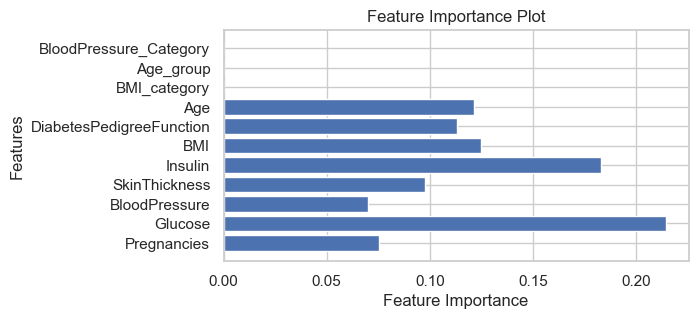

In [155]:
plt.figure(figsize=(6, 3))
plt.barh(x.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [156]:
df_scaled.drop(columns=['BloodPressure_Category', 'Age_group', 'BMI_category'], inplace=True)

### Model Training

In [357]:
# spliting dataset into dependant and independant variables
x = df_scaled.drop('Outcome', axis=1)
y = df['Outcome']

### Logistic Regression

In [358]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression()

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [361]:
L_model.fit(x_train, y_train)

LogisticRegression()

In [362]:
L_model.score(x_test, y_test)

0.8246753246753247

#### Confusion Matrix

In [363]:
y_predicted = L_model.predict(x_test)

In [364]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[94,  9],
       [18, 33]], dtype=int64)

Text(17.25, 0.5, 'Truth')

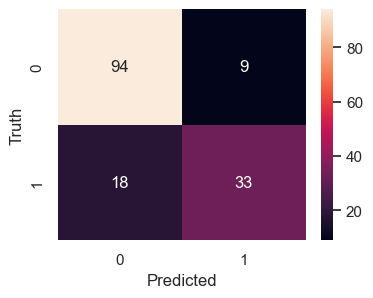

In [365]:
plt.figure(figsize = (4, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [366]:
score = accuracy_score(y_pred, y_test)
score

0.5194805194805194

In [367]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       103
           1       0.26      0.24      0.24        51

    accuracy                           0.52       154
   macro avg       0.45      0.45      0.45       154
weighted avg       0.51      0.52      0.51       154



### Decision Tree

In [371]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [372]:
#pre-pruning
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
cv = GridSearchCV(model, parameter, scoring='accuracy')
cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [373]:
best_model = cv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=3, max_features='log2')

In [374]:
y_pred = cv.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [375]:
score = accuracy_score(y_pred, y_test)
score

0.8051948051948052

In [376]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       103
           1       0.82      0.53      0.64        51

    accuracy                           0.81       154
   macro avg       0.81      0.74      0.75       154
weighted avg       0.81      0.81      0.79       154



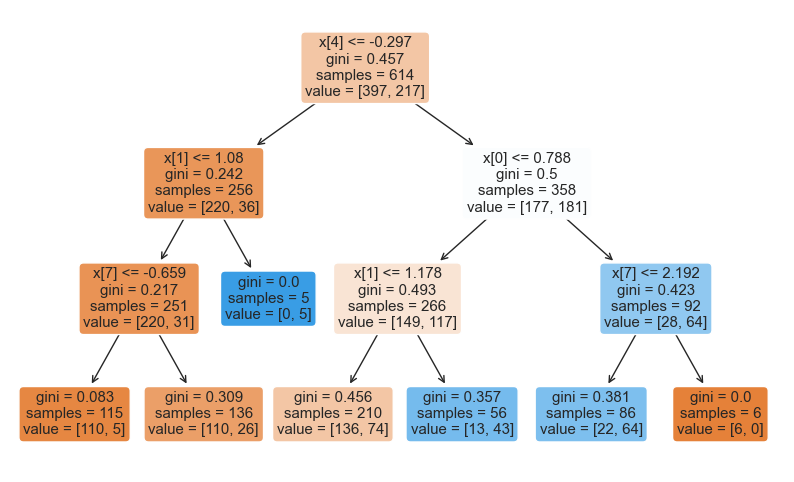

In [377]:
plt.figure(figsize=(10, 6))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)
plt.show()

### Support Vector Machine

In [378]:
from sklearn.svm import SVC
parameters = {
    'C': [0.2, 0.4, 0.6, 0.8, 1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
from sklearn.model_selection import GridSearchCV
model = SVC()
cv = GridSearchCV(model, parameters, scoring='accuracy')
cv.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [379]:
best_model = cv.best_estimator_
best_model

SVC(C=0.8, kernel='linear')

In [380]:
y_pred = cv.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [381]:
score = accuracy_score(y_pred, y_test)
score

0.8181818181818182

In [382]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       103
           1       0.78      0.63      0.70        51

    accuracy                           0.82       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



<div class="alert alert-block alert-info">

After rigorous model evaluation, which included Logistic Regression, Decision Tree, and Support Vector Machine (SVM), we can confidently report our findings:

Support Vector Machine (SVM):

- SVM emerged as the top-performing model, achieving an impressive accuracy rate of 82%.
- The F1 score, a balanced metric for both precision and recall, demonstrated robust performance, with a score of 87 for class 0 and 70 for class 1. This indicates SVM's ability to provide an excellent trade-off between precision and recall for both negative and positive classes.

</div>

**Conclusion:**

In this data-driven project focused on predicting diabetes in Pima Indian women aged at least 21 years old, a comprehensive journey was undertaken, encompassing various aspects of data analysis, preprocessing, model training, evaluation, and feature interpretation. The key takeaways and conclusions from this solitary effort are as follows:

**Data Exploration and Preprocessing:**
- A dataset comprising vital health-related attributes was meticulously examined, revealing inconsistencies and missing data points.
- Several attributes, including 'Glucose,' 'BloodPressure,' 'SkinThickness,' 'Insulin,' and 'BMI,' contained zero values and required attention.
- Missing values were addressed through imputation techniques, ensuring data integrity.
- Categorical features were encoded, and numerical attributes were standardized to ready the data for modeling.

**Feature Importance and Model Selection:**
- Three classification models, including Logistic Regression, Decision Tree Classifier, and Support Vector Machine (SVM), were employed to predict diabetes.
- Extensive hyperparameter tuning was executed for the SVM model using GridSearchCV, culminating in the selection of optimal hyperparameters.
- After rigorous evaluation, the SVM model emerged as the most promising classifier for diabetes prediction.

**Model Training and Performance:**
- Logistic Regression, Decision Tree Classifier, and SVM were trained and evaluated.
- The SVM model demonstrated superior performance with an accuracy of approximately 82, outperforming the other classifiers.
- Furthermore, precision, recall, and F1-score metrics were computed, affirming the SVM's capacity to effectively distinguish between diabetes and non-diabetes cases.
- SVM's proficiency in handling complex decision boundaries made it the model of choice for diabetes prediction.

**Interpretation:**
- The SVM classifier, with its unique capability to identify non-linear relationships, presented a robust solution for the task at hand.
- This model highlighted the importance of certain features, most notably 'Glucose' and 'BMI,' in accurately predicting diabetes.



In summary, this project is a substantial step toward the development of a reliable model for predicting diabetes in Pima Indian women. The insights gained have the potential to support healthcare practitioners in identifying individuals at risk of diabetes, enabling proactive intervention and preventive measures. The Support Vector Machine, following rigorous evaluation, has been selected as the optimal classifier for the task, emphasizing its critical role in improving public health outcomes.